In [802]:
import pandas as pd

In [803]:
df = pd.read_csv('/content/ipo_data.csv')

In [804]:
df.head(8)

,Unnamed: 0,Equity,Issue price,Listed Date,Open,Close,Listing Gains (%ge),CMP,Current gains %ge
0,0,Anupam Rasayan,555.0,24th Mar,534.70,525.90,-5.24,502.60,-9.44
1,1,Heranba,627.0,5th Mar,900.00,812.25,29.55,628.00,0.16
2,2,Railtel,94.0,26th Feb,109.00,121.40,29.15,128.60,36.81
3,3,Nureca,400.0,25th Feb,634.95,666.65,66.66,586.80,46.70
4,4,Stove Kraft,385.0,5th Feb,498.00,445.95,15.83,449.30,16.70
5,5,Home First,518.0,3rd Feb,612.15,527.40,1.81,464.15,-10.40
6,6,Indigo Paints,1490.0,2nd Feb,2607.50,3118.65,109.31,NaN,53.42
7,7,IRFC,26.0,29th Jan,25.00,24.85,-4.42,23.05,-11.35


In [805]:
#the 1st row is from 24/03/2021. We will take data from start of Jan 2020 to March 2021.
#See  below row 211 is for start of Jan 2020.

In [806]:
df.iloc[211]

Unnamed: 0                        211
Equity                 Ajooni Biotech
Issue price                        30
Listed Date                   2nd Jan
Open                               36
Close                            32.4
Listing Gains (%ge)                 8
CMP                                30
Current gains %ge                   0
Name: 211, dtype: object

In [807]:
df_ipo = df.iloc[0:212] #removing other data rows < Jan 2020

In [808]:
df_ipo.dropna(inplace=True)
df_ipo.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [809]:
df_ipo = df_ipo.drop(['Unnamed: 0'], axis = 1) #to remove extra row column that was added

In [810]:
df_ipo[df_ipo['Open'] == 0.0] #missing open price values, where 0 was recorded.

,Equity,Issue price,Listed Date,Open,Close,Listing Gains (%ge),CMP,Current gains %ge
77,Ridings Consult,18.0,26th Mar,0.0,18.00,0.00,8.35,-53.61
78,Active Clothing,65.0,26th Mar,0.0,65.65,1.00,10.05,-84.54
80,Shreeshay Engin,15.0,21st Mar,0.0,15.23,1.53,16.00,6.67
92,Moksh Ornaments,37.0,3rd Jan,0.0,44.40,20.00,43.00,16.22


In [811]:
#manually entering the prices after checking listings from websites.
df_ipo.loc[92, 'Open'] = 44.40
df_ipo.loc[77, 'Open'] = 18.50
df_ipo.loc[78, 'Open'] = 64.95
df_ipo.loc[80, 'Open'] = 15.25

In [812]:
df_ipo.shape

(94, 8)

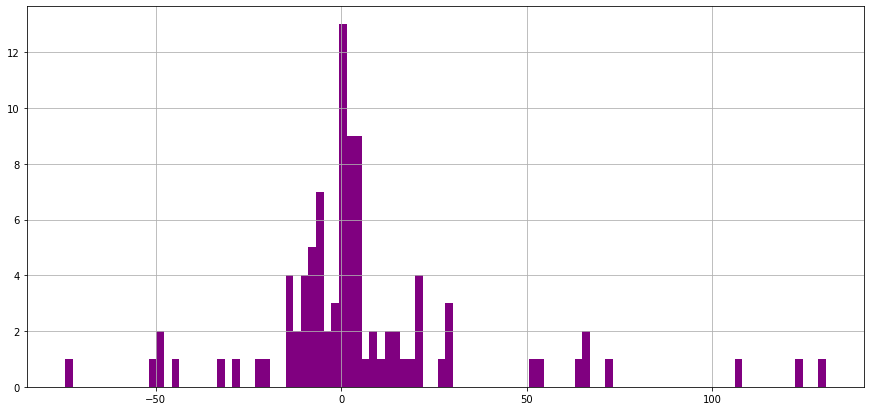

In [813]:
import seaborn as sns
import matplotlib.pyplot as plt
df_ipo['Listing Gains (%ge)'].hist(figsize=(15,7), bins=100, color='purple')

In [814]:
df_ipo['Chg Open to Close'] = df_ipo['Close'] - df_ipo['Open']
df_ipo['% Chg Open to Close'] = (df_ipo['Chg Open to Close']/df_ipo['Open']) * 100

In [815]:
df_ipo.head()

,Equity,Issue price,Listed Date,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close
0,Anupam Rasayan,555.0,24th Mar,534.70,525.90,-5.24,502.6,-9.44,-8.80,-1.645783
1,Heranba,627.0,5th Mar,900.00,812.25,29.55,628.0,0.16,-87.75,-9.750000
2,Railtel,94.0,26th Feb,109.00,121.40,29.15,128.6,36.81,12.40,11.376147
3,Nureca,400.0,25th Feb,634.95,666.65,66.66,586.8,46.70,31.70,4.992519
4,Stove Kraft,385.0,5th Feb,498.00,445.95,15.83,449.3,16.70,-52.05,-10.451807


In [816]:
pd.set_option('display.max_rows', 500)

In [817]:
#so below data shows if we bought each ipo from 2020 till now at opening price and sold at closing price we would be in a
df_ipo['% Chg Open to Close'].describe()

count    94.000000
mean     -3.642998
std      15.889058
min     -74.400000
25%      -4.899207
50%       0.000000
75%       4.102522
max      43.387097
Name: % Chg Open to Close, dtype: float64

In [818]:
#So below data shows if we bought each ipo from 2020 till now at opening price and sold at closing price we would be in a loss of Rs. 594
df_ipo['Chg Open to Close'].sum()

-593.4100000000002

In [819]:
#So there is only a total of this profit for ipos that closed with higher than opening price.
df_ipo[df_ipo['Chg Open to Close'] > 0]['Chg Open to Close'].sum()

425.9

In [820]:
df_ipo

,Equity,Issue price,Listed Date,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close
0,Anupam Rasayan,555.00,24th Mar,534.70,525.90,-5.24,502.60,-9.44,-8.80,-1.645783
1,Heranba,627.00,5th Mar,900.00,812.25,29.55,628.00,0.16,-87.75,-9.750000
2,Railtel,94.00,26th Feb,109.00,121.40,29.15,128.60,36.81,12.40,11.376147
3,Nureca,400.00,25th Feb,634.95,666.65,66.66,586.80,46.70,31.70,4.992519
4,Stove Kraft,385.00,5th Feb,498.00,445.95,15.83,449.30,16.70,-52.05,-10.451807
5,Home First,518.00,3rd Feb,612.15,527.40,1.81,464.15,-10.40,-84.75,-13.844646
6,IRFC,26.00,29th Jan,25.00,24.85,-4.42,23.05,-11.35,-0.15,-0.600000
7,Antony Waste,315.00,1st Jan,430.00,407.25,29.29,255.15,-19.00,-22.75,-5.290698
8,Bectors Food,288.00,24th Dec,501.00,595.55,106.79,336.35,16.79,94.55,18.872255
9,Burger King,60.00,14th Dec,115.35,138.40,130.67,135.30,125.50,23.05,19.982661


In [821]:
df_ipo.dtypes #our listed date column is an object.

Equity                  object
Issue price            float64
Listed Date             object
Open                   float64
Close                  float64
Listing Gains (%ge)    float64
CMP                    float64
Current gains %ge      float64
Chg Open to Close      float64
% Chg Open to Close    float64
dtype: object

In [822]:
df_ipo['Listed Date'] = pd.Series(df_ipo['Listed Date'], dtype="string") #converting listed date column to string.

In [823]:
df_ipo.dtypes

Equity                  object
Issue price            float64
Listed Date             string
Open                   float64
Close                  float64
Listing Gains (%ge)    float64
CMP                    float64
Current gains %ge      float64
Chg Open to Close      float64
% Chg Open to Close    float64
dtype: object

In [824]:
import operator

def dateConversion(date):
  day =''
  month = ''
  val_month = 0
  if operator.contains(date, "th"): 
    day, month = date.split("th")
  if operator.contains(date, "rd"): 
    day, month = date.split("rd")
  if operator.contains(date, "nd"):
    day, month = date.split("nd")
  if operator.contains(date, "st"):
    day, month = date.split("st")
  
  day = day.strip()

  if(int(day) < 10):
    day = str(day)
    day = '0' + day

  month = month.strip()
  months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #list items based on data
  if month in months:
    val_month = months.index(month) + 1 #getting month value
  if(val_month < 10):
    val_month = str(val_month)
    val_month = '0' + val_month
  day = day + ' ' + str(val_month) 
  return day

In [825]:
df_ipo['Listed Date_'] = df_ipo['Listed Date'].apply(lambda x: dateConversion(x))
df_ipo['Listed Date_'] = df_ipo['Listed Date_'] + ' ' + (['2021']*8 + ['2020']*(len(df_ipo)-8)) #adding 2021 to first 8 rows and to rest 2020

In [826]:
df_ipo.head()

,Equity,Issue price,Listed Date,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close,Listed Date_
0,Anupam Rasayan,555.0,24th Mar,534.70,525.90,-5.24,502.6,-9.44,-8.80,-1.645783,24 03 2021
1,Heranba,627.0,5th Mar,900.00,812.25,29.55,628.0,0.16,-87.75,-9.750000,05 03 2021
2,Railtel,94.0,26th Feb,109.00,121.40,29.15,128.6,36.81,12.40,11.376147,26 02 2021
3,Nureca,400.0,25th Feb,634.95,666.65,66.66,586.8,46.70,31.70,4.992519,25 02 2021
4,Stove Kraft,385.0,5th Feb,498.00,445.95,15.83,449.3,16.70,-52.05,-10.451807,05 02 2021


In [827]:
df_ipo['Date'] = pd.to_datetime(df_ipo['Listed Date_'], format='%d %m %Y')

In [828]:
df_ipo.drop(['Listed Date', 'Listed Date_'], axis = 1, inplace=True)
df_ipo.head()

,Equity,Issue price,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close,Date
0,Anupam Rasayan,555.0,534.70,525.90,-5.24,502.6,-9.44,-8.80,-1.645783,2021-03-24
1,Heranba,627.0,900.00,812.25,29.55,628.0,0.16,-87.75,-9.750000,2021-03-05
2,Railtel,94.0,109.00,121.40,29.15,128.6,36.81,12.40,11.376147,2021-02-26
3,Nureca,400.0,634.95,666.65,66.66,586.8,46.70,31.70,4.992519,2021-02-25
4,Stove Kraft,385.0,498.00,445.95,15.83,449.3,16.70,-52.05,-10.451807,2021-02-05


In [829]:
df_ipo.dtypes

Equity                         object
Issue price                   float64
Open                          float64
Close                         float64
Listing Gains (%ge)           float64
CMP                           float64
Current gains %ge             float64
Chg Open to Close             float64
% Chg Open to Close           float64
Date                   datetime64[ns]
dtype: object

In [830]:
nifty = pd.read_csv('/content/nifty100.csv') #data downloaded from nifty website.

In [831]:
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
304,18-Mar-2021,14959.05,14977.45,14581.95,14662.50,851112777,38439.09
305,19-Mar-2021,14573.30,14886.95,14434.10,14847.25,1310491137,58031.17
306,22-Mar-2021,14850.75,14885.65,14729.45,14859.70,720614069,34824.12
307,23-Mar-2021,14898.30,15011.05,14849.15,14952.10,787545946,38355.41
308,24-Mar-2021,14853.20,14902.65,14676.35,14690.05,747133448,34604.19


In [832]:
nifty.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Shares Traded          int64
Turnover (Rs. Cr)    float64
dtype: object

In [833]:
from dateutil.parser import parse
def parseDate(date):
  dt = parse(date)
  return dt.strftime('%d-%m-%Y')

In [834]:
nifty['Nifty Date'] = nifty['Date'].apply(lambda x: parseDate(x))

In [835]:
nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Nifty Date
0,01-Jan-2020,12299.85,12320.75,12263.20,12279.05,446251194,12946.17,01-01-2020
1,02-Jan-2020,12294.95,12387.65,12292.20,12380.50,645781490,19429.69,02-01-2020
2,03-Jan-2020,12359.70,12368.60,12292.40,12328.60,671669795,21761.81,03-01-2020
3,06-Jan-2020,12270.25,12278.25,12070.75,12090.60,652762014,21896.93,06-01-2020
4,07-Jan-2020,12174.65,12255.75,12106.30,12154.95,736051577,23115.45,07-01-2020
5,08-Jan-2020,12034.40,12145.00,12026.80,12131.45,948960796,22902.66,08-01-2020
6,09-Jan-2020,12259.55,12328.25,12241.75,12319.70,1053400858,24027.71,09-01-2020
7,10-Jan-2020,12372.00,12412.95,12316.60,12359.70,939484313,24092.51,10-01-2020
8,13-Jan-2020,12401.15,12442.55,12391.50,12436.45,783662824,22316.59,13-01-2020
9,14-Jan-2020,12442.60,12480.45,12417.70,12468.55,838396839,23098.00,14-01-2020


In [836]:
nifty['Date'] = pd.to_datetime(nifty['Nifty Date'], format='%d-%m-%Y')

In [837]:
nifty.drop(['Nifty Date'], axis = 1, inplace=True)

In [838]:
nifty.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Shares Traded                 int64
Turnover (Rs. Cr)           float64
dtype: object

In [839]:
nifty.tail(3)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
306,2021-03-22,14850.75,14885.65,14729.45,14859.70,720614069,34824.12
307,2021-03-23,14898.30,15011.05,14849.15,14952.10,787545946,38355.41
308,2021-03-24,14853.20,14902.65,14676.35,14690.05,747133448,34604.19


In [840]:
nifty.rename(columns={'Open': 'NiftyOpen', 'High': 'NiftyHigh', 'Low' :'NiftyLow', 'Close' : 'NiftyClose', 'Shares Traded' : 'Volume'}, inplace=True)

In [846]:
nifty.tail(3)

,Date,NiftyOpen,NiftyHigh,NiftyLow,NiftyClose,Volume,Turnover (Rs. Cr)
306,2021-03-22,14850.75,14885.65,14729.45,14859.70,720614069,34824.12
307,2021-03-23,14898.30,15011.05,14849.15,14952.10,787545946,38355.41
308,2021-03-24,14853.20,14902.65,14676.35,14690.05,747133448,34604.19


In [842]:
dfipo = pd.merge(df_ipo, nifty, on=['Date'], how='inner')

In [843]:
dfipo.head()

,Equity,Issue price,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close,Date,NiftyOpen,NiftyHigh,NiftyLow,NiftyClose,Volume,Turnover (Rs. Cr)
0,Anupam Rasayan,555.0,534.70,525.90,-5.24,502.6,-9.44,-8.80,-1.645783,2021-03-24,14853.20,14902.65,14676.35,14690.05,747133448,34604.19
1,Heranba,627.0,900.00,812.25,29.55,628.0,0.16,-87.75,-9.750000,2021-03-05,15139.75,15248.70,15009.20,15084.35,1008799017,46494.90
2,Railtel,94.0,109.00,121.40,29.15,128.6,36.81,12.40,11.376147,2021-02-26,15005.00,15045.15,14604.25,14667.60,1629245878,78894.50
3,Nureca,400.0,634.95,666.65,66.66,586.8,46.70,31.70,4.992519,2021-02-25,15193.55,15281.25,15177.60,15209.00,1156997060,52549.79
4,Stove Kraft,385.0,498.00,445.95,15.83,449.3,16.70,-52.05,-10.451807,2021-02-05,15040.75,15099.25,14938.80,14988.95,1556801120,65045.10


In [847]:
inr_exchangeRates = pd.read_csv('/content/ExcelratesExchangerates.csv') #downloaded from excelerates.com

In [848]:
inr_exchangeRates.head()

,Date,USD,INR
0,24 Mar 2021,1,72.6076
1,23 Mar 2021,1,72.4586
2,22 Mar 2021,1,72.3541
3,21 Mar 2021,1,72.5048
4,20 Mar 2021,1,72.5048


In [849]:
inr_exchangeRates['Date'] = inr_exchangeRates['Date'].apply(lambda x: parseDate(x))

In [851]:
inr_exchangeRates['Date'] = pd.to_datetime(inr_exchangeRates['Date'], format='%d-%m-%Y')

In [853]:
inr_exchangeRates.dtypes

Date    datetime64[ns]
USD              int64
INR            float64
dtype: object

In [852]:
inr_exchangeRates.head()

,Date,USD,INR
0,2021-03-24,1,72.6076
1,2021-03-23,1,72.4586
2,2021-03-22,1,72.3541
3,2021-03-21,1,72.5048
4,2021-03-20,1,72.5048


In [854]:
ipo_final = pd.merge(dfipo, inr_exchangeRates, on=['Date'], how='inner')

In [856]:
ipo_final.drop(['USD', 'Turnover (Rs. Cr)'], inplace=True, axis = 1)

In [857]:
ipo_final.head()

,Equity,Issue price,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close,Date,NiftyOpen,NiftyHigh,NiftyLow,NiftyClose,Volume,INR
0,Anupam Rasayan,555.0,534.70,525.90,-5.24,502.6,-9.44,-8.80,-1.645783,2021-03-24,14853.20,14902.65,14676.35,14690.05,747133448,72.6076
1,Heranba,627.0,900.00,812.25,29.55,628.0,0.16,-87.75,-9.750000,2021-03-05,15139.75,15248.70,15009.20,15084.35,1008799017,73.0696
2,Railtel,94.0,109.00,121.40,29.15,128.6,36.81,12.40,11.376147,2021-02-26,15005.00,15045.15,14604.25,14667.60,1629245878,73.9020
3,Nureca,400.0,634.95,666.65,66.66,586.8,46.70,31.70,4.992519,2021-02-25,15193.55,15281.25,15177.60,15209.00,1156997060,72.6331
4,Stove Kraft,385.0,498.00,445.95,15.83,449.3,16.70,-52.05,-10.451807,2021-02-05,15040.75,15099.25,14938.80,14988.95,1556801120,72.9091


In [876]:
import datetime
import calendar
def dayFinder(date):
  date = str(date)
  day_name= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
  born = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').weekday()
  day = calendar.day_name[born]
  value = day_name.index(day)
  return value

In [877]:
ipo_final['Day'] = ipo_final['Date'].apply(lambda x: dayFinder(x))

In [878]:
ipo_final.head() #0 for sunday,  1 for monday, 2 for tuesday, 3 for wednesday and so on 

,Equity,Issue price,Open,Close,Listing Gains (%ge),CMP,Current gains %ge,Chg Open to Close,% Chg Open to Close,Date,NiftyOpen,NiftyHigh,NiftyLow,NiftyClose,Volume,INR,Day
0,Anupam Rasayan,555.0,534.70,525.90,-5.24,502.6,-9.44,-8.80,-1.645783,2021-03-24,14853.20,14902.65,14676.35,14690.05,747133448,72.6076,3
1,Heranba,627.0,900.00,812.25,29.55,628.0,0.16,-87.75,-9.750000,2021-03-05,15139.75,15248.70,15009.20,15084.35,1008799017,73.0696,5
2,Railtel,94.0,109.00,121.40,29.15,128.6,36.81,12.40,11.376147,2021-02-26,15005.00,15045.15,14604.25,14667.60,1629245878,73.9020,5
3,Nureca,400.0,634.95,666.65,66.66,586.8,46.70,31.70,4.992519,2021-02-25,15193.55,15281.25,15177.60,15209.00,1156997060,72.6331,4
4,Stove Kraft,385.0,498.00,445.95,15.83,449.3,16.70,-52.05,-10.451807,2021-02-05,15040.75,15099.25,14938.80,14988.95,1556801120,72.9091,5


In [884]:
ipo_final.isnull().sum() #final check

Equity                 0
Issue price            0
Open                   0
Close                  0
Listing Gains (%ge)    0
CMP                    0
Current gains %ge      0
Chg Open to Close      0
% Chg Open to Close    0
Date                   0
NiftyOpen              0
NiftyHigh              0
NiftyLow               0
NiftyClose             0
Volume                 0
INR                    0
Day                    0
dtype: int64

In [885]:
ipo_final.to_csv('/content/final_data.csv') #saving to csv file